In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# train_id = pd.read_csv('train_identity.csv')
# train_trans = pd.read_csv('train_transaction.csv')

# test_id = pd.read_csv('test_identity.csv')
# test_trans = pd.read_csv('test_transaction.csv')

In [ ]:
# train = pd.merge(train_id, train_trans, how='right', on='TransactionID')
# test = pd.merge(test_id, test_trans, how='right', on='TransactionID')

# train.to_csv('train_combined.csv')
# test.to_csv('test_combined.csv')

# train = pd.read_csv('train_combined.csv')
# test = pd.read_csv('test_combined.csv')

In [3]:
train_id = pd.read_csv('train_id_red_mem.csv') # Object's are already label encoded
train_trans = pd.read_csv('train_trans_red_mem.csv') # Object's are already label encoded

test_id = pd.read_csv('test_id_red_mem.csv') # Object's are already label encoded
test_trans = pd.read_csv('test_trans_red_mem.csv') # Object's are already label encoded

In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [107]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 42 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [5]:
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [5]:
test_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 43 columns):
TransactionID      141907 non-null int64
id_01              141907 non-null float64
id_02              136976 non-null float64
id_03              66481 non-null float64
id_04              66481 non-null float64
id_05              134750 non-null float64
id_06              134750 non-null float64
id_07              5059 non-null float64
id_08              5059 non-null float64
id_09              74338 non-null float64
id_10              74338 non-null float64
id_11              136778 non-null float64
id_12              141907 non-null int64
id_13              130286 non-null float64
id_14              71357 non-null float64
id_15              136977 non-null float64
id_16              125747 non-null float64
id_17              135966 non-null float64
id_18              50875 non-null float64
id_19              135906 non-null float64
id_20              135633 non-null float64


In [6]:
test_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(389), int64(4)
memory usage: 1.5 GB


In [108]:
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0


In [8]:
test_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [7]:
test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

#### train_id / test_id

In [7]:
# Rename obvious columns to make train_id more clear
train_id.rename(index=str, columns={'DeviceType':'is_desktop', 'id_34':'match_status', 'id_33':'screen_dimen',
                                   'id_31':'browser', 'id_30':'os'}, inplace=True)

test_id.rename(index=str, columns={'DeviceType':'is_desktop', 'id_34':'match_status', 'id_33':'screen_dimen',
                                   'id_31':'browser', 'id_30':'os'}, inplace=True)

In [9]:
# multiply screen dimensions to generate a useable number
train_id['screen_dimen'] = train_id['screen_dimen'].dropna().str.split('x')
train_id['screen_dimen'] = train_id['screen_dimen'].dropna().apply(lambda x: int(x[0])*int(x[1])).astype(float)

test_id['screen_dimen'] = test_id['screen_dimen'].dropna().str.split('x')
test_id['screen_dimen'] = test_id['screen_dimen'].dropna().apply(lambda x: int(x[0])*int(x[1]))

In [10]:
# Keep only match_status number
train_id['match_status'] = train_id['match_status'].dropna().str.split(':')
train_id['match_status'] = train_id['match_status'].dropna().apply(lambda x: x[1]).astype(float)

test_id['match_status'] = test_id['match_status'].dropna().str.split(':')
test_id['match_status'] = test_id['match_status'].dropna().apply(lambda x: x[1]).astype(float)

In [11]:
# Make column for os version and os type / browser version and type
train_id['os_type'] = train_id['os'].dropna().map(lambda x: re.sub('[0-9._]', '', x))
train_id['os_version'] = train_id['os'].dropna().map(lambda x: re.sub('[^0-9._,]', '', x))

test_id['os_type'] = test_id['os'].dropna().map(lambda x: re.sub('[0-9._]', '', x))
test_id['os_version'] = test_id['os'].dropna().map(lambda x: re.sub('[^0-9._,]', '', x))

train_id['browser_type'] = train_id['browser'].dropna().map(lambda x: re.sub('[0-9._]', '', x))
train_id['browser_version'] = train_id['browser'].dropna().map(lambda x: re.sub('[^0-9._,]', '', x))

test_id['browser_type'] = test_id['browser'].dropna().map(lambda x: re.sub('[A-Za-z]', '', x))
test_id['browser_version'] = test_id['browser'].dropna().map(lambda x: re.sub('[^0-9._,]', '', x))

train_id = train_id.drop(['os', 'browser'], axis=1)
test_id = test_id.drop(['os', 'browser'], axis=1)

In [ ]:
# Split P/R emails into provider and domain.  Then label encode.
train_id['R_email_provider'] = train_id['R_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[0])
train_id['R_email_domain'] = train_id['R_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[-1])
train_id['P_email_provider'] = train_id['P_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[0])
train_id['P_email_domain'] = train_id['P_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[-1])

train_id['R_email_provider'] = le.fit_transform(train_id['R_email_provider'])
train_id['R_email_domain'] = le.fit_transform(train_id['R_email_domain'])
train_id['P_email_provider'] = le.fit_transform(train_id['P_email_provider'])
train_id['P_email_domain'] = le.fit_transform(train_id['P_email_domain'])

test_id['R_email_provider'] = test_id['R_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[0])
test_id['R_email_domain'] = test_id['R_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[-1])
test_id['P_email_provider'] = test_id['P_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[0])
test_id['P_email_domain'] = test_id['P_emaildomain'].fillna('none_given.none_given').apply(lambda x: x.split('.')[-1])

test_id['R_email_provider'] = le.fit_transform(test_id['R_email_provider'])
test_id['R_email_domain'] = le.fit_transform(test_id['R_email_domain'])
test_id['P_email_provider'] = le.fit_transform(test_id['P_email_provider'])
test_id['P_email_domain'] = le.fit_transform(test_id['P_email_domain'])

train_id = train_id.drop(['P_emaildomain', 'R_emaildomain'], axis=1)
test_id = test_id.drop(['P_emaildomain', 'R_emaildomain'], axis=1)

In [12]:
# LabelEncode object columns
for i in train_id.select_dtypes(include='object').columns:
    d = dict(zip(train_id[i].dropna().unique(), range(len(train_id[i].dropna().unique())))) # dict with label for object columns
    train_id[i] = train_id[i].map(d)
    
for i in test_id.select_dtypes(include='object').columns:
    d = dict(zip(test_id[i].dropna().unique(), range(len(test_id[i].dropna().unique())))) # dict with label for object columns
    test_id[i] = test_id[i].map(d)

#### train_trans / test_trans

In [18]:
# LabelEncode object columns
for i in train_trans.select_dtypes(include='object').columns:
    d = dict(zip(train_trans[i].dropna().unique(), range(len(train_trans[i].dropna().unique())))) # dict with label for object columns
    train_trans[i] = train_trans[i].map(d)
    
for i in test_trans.select_dtypes(include='object').columns:
    d = dict(zip(test_trans[i].dropna().unique(), range(len(test_trans[i].dropna().unique())))) # dict with label for object columns
    test_trans[i] = test_trans[i].map(d)
    
# train_id = reduce_mem_usage(train_id)
# train_trans = reduce_mem_usage(train_trans)
# train_id.to_csv('train_id_red_mem.csv', index=False) # make new CSV with smaller file size
# train_trans.to_csv('train_trans_red_mem.csv', index=False) # make new CSV with smaller file size

# test_id = reduce_mem_usage(test_id)
# test_trans = reduce_mem_usage(test_trans)
# test_id.to_csv('test_id_red_mem.csv', index=False) # make new CSV with smaller file size
# test_trans.to_csv('test_trans_red_mem.csv', index=False) # make new CSV with smaller file size

Mem. usage decreased to 18.76 Mb (65.6% reduction)
Mem. usage decreased to 494.47 Mb (72.1% reduction)
Mem. usage decreased to 13.40 Mb (71.9% reduction)
Mem. usage decreased to 431.51 Mb (71.6% reduction)


In [14]:
# Cramer's V categorical correlation
# Code from https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

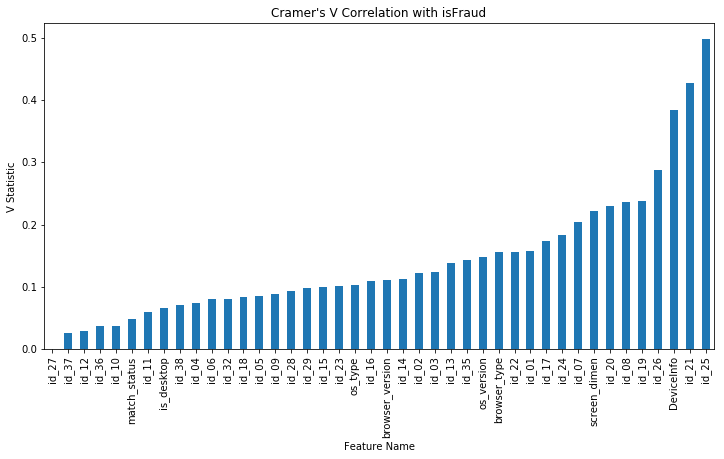

In [15]:
# Plot Cramer's V results from train_id

d = dict() # Dict to store column name and Cramer's V
for i in train_id.drop(['TransactionID', 'isFraud'], axis=1):
    d[i] = cramers_v(train_id[[i, 'isFraud']].dropna()[i], train_id[[i, 'isFraud']].dropna()['isFraud'])
    
cramers_df = pd.DataFrame(index=d.keys(), data=d.values(), columns=['V'])
plt.figure(figsize=[12,6])
plt.xlabel('Feature Name')
plt.ylabel('V Statistic')
plt.title("Cramer's V Correlation with isFraud")
cramers_df['V'].sort_values().plot(kind='bar')

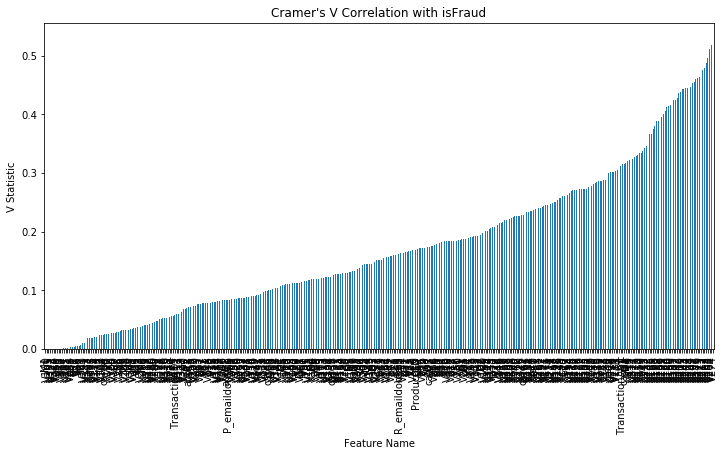

In [17]:
# Plot Cramer's V results from train_trans
d = dict() # Dict to store column name and Cramer's V
for i in train_trans.drop(['TransactionID', 'isFraud'], axis=1):
    d[i] = cramers_v(train_trans[[i, 'isFraud']].dropna()[i], train_trans[[i, 'isFraud']].dropna()['isFraud'])
    
cramers_df = pd.DataFrame(index=d.keys(), data=d.values(), columns=['V'])
plt.figure(figsize=[12,6])
plt.xlabel('Feature Name')
plt.ylabel('V Statistic')
plt.title("Cramer's V Correlation with isFraud")
cramers_df['V'].sort_values().plot(kind='bar') # Some features have very high correlation with isFraud

#### Missing Values

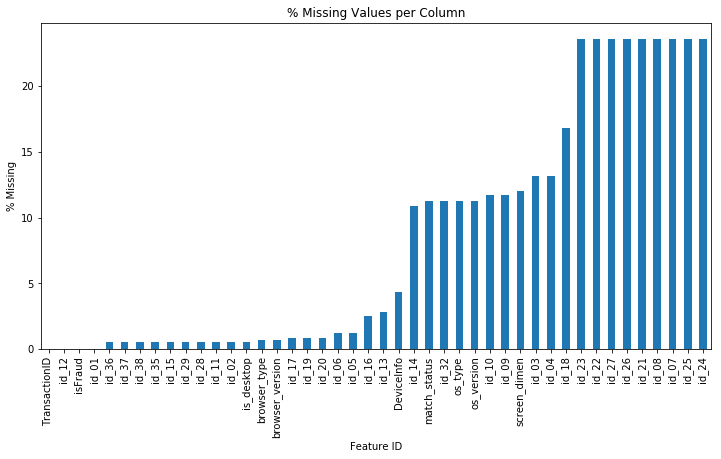

In [24]:
# Plot % missing values for each train_id feature
plt.figure(figsize=[12,6])
plt.xlabel('Feature ID')
plt.ylabel('% Missing')
plt.title('% Missing Values per Column')
((train_id.isnull().sum()/len(train_trans))*100).sort_values().plot(kind='bar')

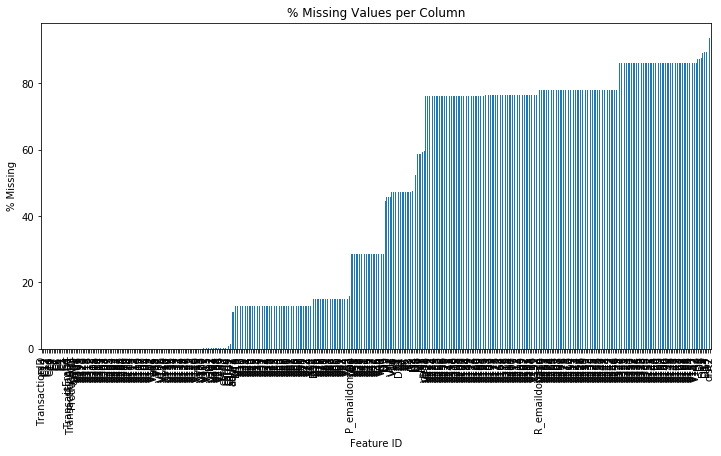

In [25]:
# Plot % missing values for each train_trans feature
plt.figure(figsize=[12,6])
plt.xlabel('Feature ID')
plt.ylabel('% Missing')
plt.title('% Missing Values per Column')
((train_trans.isnull().sum()/len(train_trans))*100).sort_values().plot(kind='bar')

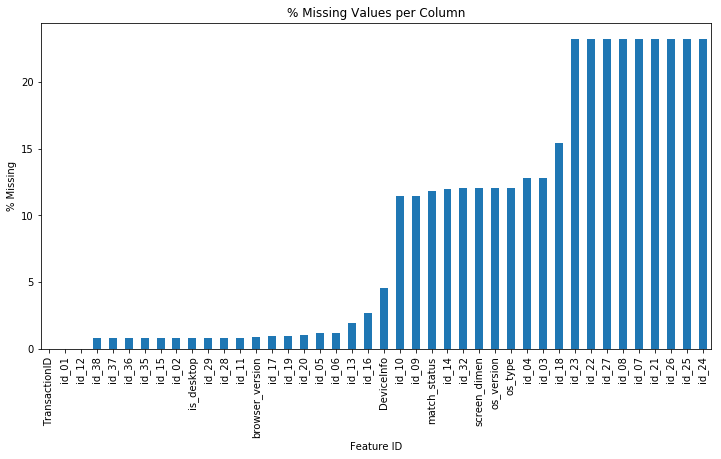

In [26]:
# Plot % missing values for each test_id feature
plt.figure(figsize=[12,6])
plt.xlabel('Feature ID')
plt.ylabel('% Missing')
plt.title('% Missing Values per Column')
((test_id.isnull().sum()/len(train_trans))*100).sort_values().plot(kind='bar')

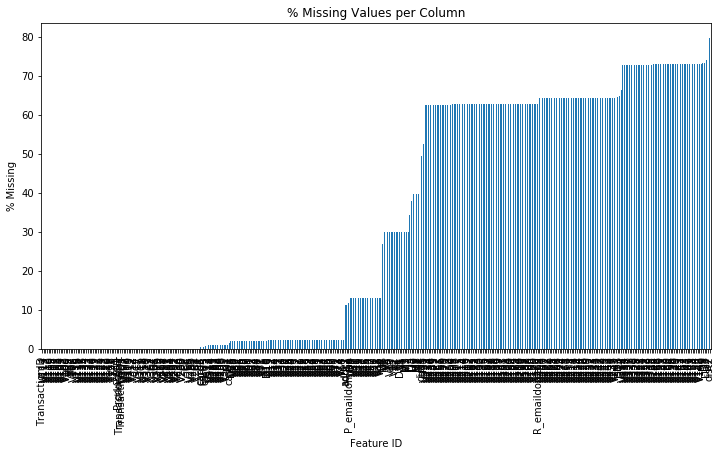

In [27]:
# Plot % missing values for each test_trans feature
plt.figure(figsize=[12,6])
plt.xlabel('Feature ID')
plt.ylabel('% Missing')
plt.title('% Missing Values per Column')
((test_trans.isnull().sum()/len(train_trans))*100).sort_values().plot(kind='bar')

In [19]:
# Drop train_id / test_id columns with > 60% missing values
for i in train_id.columns:
    if train_id[i].isnull().sum() > len(train_id.index)*0.6:
        train_id = train_id.drop(i, axis=1)
        
for i in test_id.columns:
    if test_id[i].isnull().sum() > len(test_id.index)*0.6:
        test_id = test_id.drop(i, axis=1)

# Drop train_trans / test_trans columns with > 60% missing values
for i in train_trans.columns:
    if train_trans[i].isnull().sum() > len(train_trans.index)*0.6:
        train_trans = train_trans.drop(i, axis=1)
        
for i in test_trans.columns:
    if test_trans[i].isnull().sum() > len(test_trans.index)*0.6:
        test_trans = test_trans.drop(i, axis=1)

In [20]:
# Fill train_id / test_id null values with -1 if % missing is <= 60%
x = []
for i in train_id.columns:
    if train_id[i].isnull().sum() <= len(train_id.index)*0.6:
        x.append(i)
train_id[x] = train_id[x].fillna(-1)

x = []
for i in test_id.columns:
    if test_id[i].isnull().sum() <= len(test_id.index)*0.6:
        x.append(i)
test_id[x] = test_id[x].fillna(-1)

# Fill train_trans / test_trans null values with -1 if % missing is <= 60%
x = []
for i in train_trans.columns:
    if train_trans[i].isnull().sum() <= len(train_trans.index)*0.6:
        x.append(i)
train_trans[x] = train_trans[x].fillna(-1)

x = []
for i in test_trans.columns:
    if test_trans[i].isnull().sum() <= len(test_trans.index)*0.6:
        x.append(i)
test_trans[x] = test_trans[x].fillna(-1)

train_id = reduce_mem_usage(train_id)
train_trans = reduce_mem_usage(train_trans)

test_id = reduce_mem_usage(test_id)
test_trans = reduce_mem_usage(test_trans)

Mem. usage decreased to 16.00 Mb (0.0% reduction)
Mem. usage decreased to 275.96 Mb (0.0% reduction)
Mem. usage decreased to 10.69 Mb (0.0% reduction)
Mem. usage decreased to 239.19 Mb (0.0% reduction)


In [24]:
# check for feature discrepencies in train / test DFs
print('train_id columns not in test_id: ', [i for i in train_id.columns if i not in test_id.columns],
      'test_id columns not in train_id: ', [i for i in test_id.columns if i not in train_id.columns],
      'train_trans columns not in test_trans: ', [i for i in train_trans.columns if i not in test_trans.columns],
      'test_trans columns not in train_trans: ', [i for i in test_trans.columns if i not in train_trans.columns],
      sep='\n')

train_id columns not in test_id: 
['isFraud']
test_id columns not in train_id: 
[]
train_trans columns not in test_trans: 
['isFraud', 'M5']
test_trans columns not in train_trans: 
[]


In [25]:
# drop train_trans column not in test_trans
train_trans = train_trans.drop(['M5'], axis=1)

#### LightGBM Regressor

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import lightgbm as lgb

In [29]:
# Baseline train_trans model with random oversampling and train_id features added
train_comb = pd.merge(train_id.drop('isFraud', axis=1), train_trans, how='right', on='TransactionID')
train_comb = train_comb.fillna(-1)

X = train_comb.drop(['TransactionID', 'isFraud'], axis=1)
y = train_comb['isFraud']

X_resampled, y_resampled = RandomOverSampler(random_state=101).fit_resample(X, y) #Random Oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state=101)

model = lgb.LGBMRegressor(random_state=101)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(roc_auc_score(y_test, pred))

0.9361860666226522


In [33]:
test_comb = pd.merge(test_id, test_trans, how='right', on='TransactionID')
test_comb = test_comb.fillna(-1)

pred_output = model.predict(test_comb.drop('TransactionID', axis=1))
pred_output = pd.DataFrame({'TransactionID':test_trans['TransactionID'], 'isFraud':pred_output}).sort_values(by='TransactionID')

submission = pd.read_csv('sample_submission.csv').drop('isFraud', axis=1)
submission = pd.merge(submission, pred_output, how='left', on='TransactionID')
submission.to_csv('IEEE-CIS_submission_V5.csv', index=False)

In [34]:
# Baseline model with random oversampling and LGBMRegressor
train_comb = pd.merge(train_id.drop('isFraud', axis=1), train_trans, how='right', on='TransactionID')
train_comb = train_comb.fillna(-1)

X = train_comb.drop(['TransactionID', 'isFraud'], axis=1)
y = train_comb['isFraud']

X_resampled, y_resampled = RandomOverSampler(random_state=101).fit_resample(X, y) #Random Oversampling

model = lgb.LGBMRegressor(random_state=101)
model.fit(X_resampled, y_resampled)

test_comb = pd.merge(test_id, test_trans, how='right', on='TransactionID')
test_comb = test_comb.fillna(-1)

pred_output = model.predict(test_comb.drop('TransactionID', axis=1))
pred_output = pd.DataFrame({'TransactionID':test_trans['TransactionID'], 'isFraud':pred_output}).sort_values(by='TransactionID')

submission = pd.read_csv('sample_submission.csv').drop('isFraud', axis=1)
submission = pd.merge(submission, pred_output, how='left', on='TransactionID')
submission.to_csv('IEEE-CIS_submission_V5a.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

train_comb = pd.merge(train_id.drop('isFraud', axis=1), train_trans, how='left', on='TransactionID')
train_comb = reduce_mem_usage(train_comb)

X = train_comb.drop(['TransactionID', 'isFraud'], axis=1)
y = train_comb['isFraud']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
# X_resampled, y_resampled = RandomOverSampler(random_state=101).fit_resample(X_train, y_train) #Random Oversampling

X_resampled, y_resampled = RandomOverSampler(random_state=101).fit_resample(X, y) #Random Oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state=101)

model = lgb.LGBMRegressor(random_state=101)

param_grid = {'num_leaves': range(25, 45, 5),
              'feature_fraction': np.arange(0.1, 0.9, 0.2),
              'bagging_fraction': np.arange(0.1, 9, 0.2),
              'max_depth': np.arange(5, 9, 1),
              'lambda_l1': np.arange(0, 5, 0.5),
              'lambda_l2': np.arange(0, 5, 0.5),
              'min_split_gain': np.arange(0.0, 0.1, 0.02),
              'min_child_weight': np.arange(5, 50, 15)}
                                 
scorer = make_scorer(roc_auc_score)
clf = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc')
clf.fit(X_resampled, y_resampled)

Mem. usage decreased to 68.09 Mb (0.0% reduction)


# Use Multiple Correspondance Analysis for dimensionality reduction